In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import optimize
from scipy.stats import poisson
import math

In [2]:
#import data from excel
data = pd.read_excel('/Users/ibhallaladd/Desktop/sup_junc_data.xlsx', dtype={'Name': str, 'Value': float}, keep_default_na = False)
#rC':\Users\clair\OneDrive\Desktop\Schewl\Yale Stuff\Junior Year\AdvancedLab\'

In [3]:
data

,NIN_1_1_inc_I,NIN_1_1_inc_V,NIN_1_1_inc_V_err,NIN_1_1_dec_I,NIN_1_1_dec_V,NIN_1_1_dec_V_err,SIN_1_1_inc_I,SIN_1_1_inc_V,SIN_1_1_inc_V_err,SIN_1_1_dec_I,SIN_1_1_dec_V,SIN_1_1_dec_V_err,SIS_1_1_inc_I,SIS_1_1_inc_V,SIS_1_1_inc_V_err,SIS_1_1_dec_I,SIS_1_1_dec_V,SIS_1_1_dec_V_err
0,-0.0005,-0.0073252,1.5418e-05,-0.0005,-0.0073274,2.7669e-05,-0.0005,-0.0090332,0,-0.0005,-0.0090315,2.0365e-05,-0.000020,-0.001388,0.000003,-0.000020,-0.001396,0.000003
1,-0.00049,-0.0073076,6.1492e-05,-0.00049,-0.0073242,0,-0.00049,-0.008792,2.6597e-05,-0.00049,-0.0087898,1.3359e-05,-0.000020,-0.001387,0.000003,-0.000020,-0.001395,0.000003
2,-0.00048,-0.0070801,0,-0.00048,-0.0070854,3.5829e-05,-0.00048,-0.0087288,0.00010534,-0.00048,-0.0086831,0.00012106,-0.000020,-0.001387,0.000002,-0.000020,-0.001394,0.000004
3,-0.00047,-0.0070271,0.00010069,-0.00047,-0.0070586,6.9198e-05,-0.00047,-0.0085449,0,-0.00047,-0.0085449,0,-0.000020,-0.001386,0.000002,-0.000020,-0.001393,0.000005
4,-0.00046,-0.0068359,0,-0.00046,-0.0068379,2.176e-05,-0.00046,-0.0083064,3.6616e-05,-0.00046,-0.008304,2.7669e-05,-0.000020,-0.001386,0.000003,-0.000020,-0.001391,0.000005
5,-0.00045,-0.0067861,9.843e-05,-0.00045,-0.0068357,7.7204e-06,-0.00045,-0.0082878,5.4723e-05,-0.00045,-0.0082798,6.8483e-05,-0.000019,-0.001385,0.000004,-0.000019,-0.001390,0.000005
6,-0.00044,-0.0065918,0,-0.00044,-0.0065928,1.5418e-05,-0.00044,-0.0080566,0,-0.00044,-0.0080566,0,-0.000019,-0.001383,0.000005,-0.000019,-0.001389,0.000004
7,-0.00043,-0.0065056,0.00011673,-0.00043,-0.0065439,9.6965e-05,-0.00043,-0.0079104,0.00011971,-0.00043,-0.0078511,8.9093e-05,-0.000019,-0.001382,0.000005,-0.000019,-0.001389,0.000004
8,-0.00042,-0.0063479,7.7204e-06,-0.00042,-0.0063477,0,-0.00042,-0.0078108,2.0365e-05,-0.00042,-0.0078062,3.8871e-05,-0.000019,-0.001381,0.000005,-0.000019,-0.001388,0.000003
9,-0.00041,-0.0063459,2.0365e-05,-0.00041,-0.0063406,4.0989e-05,-0.00041,-0.0075684,0,-0.00041,-0.0075684,0,-0.000019,-0.001380,0.000004,-0.000019,-0.001388,0.000003


In [13]:
#guesses for the fit parameters
R     = 0
delta = 0
T     = 0

firstGuess = [R, delta, T]

SIN_Vinc = data['SIN_1_1_inc_V'][0:100]
SIN_Iinc = data['SIN_1_1_inc_I'][0:100]
SIN_Vinc_err = data['SIN_1_1_inc_V_err'][0:100]

SIN_Vdec = data['SIN_1_1_dec_V'][0:100]
SIN_Idec = data['SIN_1_1_dec_I'][0:100]
SIN_Vdec_err = data['SIN_1_1_dec_V_err'][0:100]

(-0.01, 0.01)

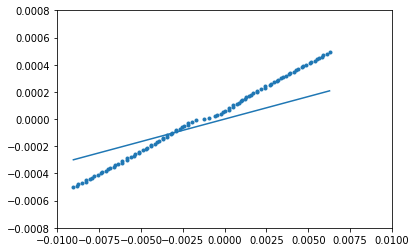

In [77]:
plt.scatter(SIN_Vinc, SIN_Iinc, marker='.')
#from NIN b offset, m=12.46 Ohms, b= -0.0012 V
#for SIN data, T is fixed at 4.2K
#delta = (4.2 K)(kB)(transition temp of lead) = (4.2 K)(kB)(7.175 K) = 0.00259 eV

plt.plot(SIN_Vinc, SINcurr(SIN_Vinc, [12.46, 0.00259, 4.2]))
plt.ylim(-0.0008, 0.0008)
plt.xlim(-0.01, 0.01)

In [72]:
SINcurr(SIN_Vinc, [12.46, 0.00259, 4.2])

array([-3.08520006e-04, -3.00282052e-04, -2.98123517e-04, -2.91842589e-04,
       -2.83696852e-04, -2.83061587e-04, -2.75165175e-04, -2.70171856e-04,
       -2.66770115e-04, -2.58491178e-04, -2.52978718e-04, -2.50143934e-04,
       -2.41813768e-04, -2.38203688e-04, -2.33473356e-04, -2.25177344e-04,
       -2.23783860e-04, -2.16799364e-04, -2.08984925e-04, -2.08452122e-04,
       -2.00121958e-04, -1.98544042e-04, -1.91781548e-04, -1.84861945e-04,
       -1.83420646e-04, -1.75114390e-04, -1.73748230e-04, -1.66767150e-04,
       -1.59820225e-04, -1.58396003e-04, -1.50134149e-04, -1.49615008e-04,
       -1.41752756e-04, -1.38415910e-04, -1.33412348e-04, -1.25474958e-04,
       -1.25058279e-04, -1.16905718e-04, -1.16680302e-04, -1.08397957e-04,
       -1.07305029e-04, -1.00060965e-04, -9.85855124e-05, -9.17205584e-05,
       -8.79021413e-05, -8.33835673e-05, -7.53949470e-05, -7.45274355e-05,
       -6.67061700e-05, -5.81027780e-05, -4.16917826e-05, -3.18192285e-05,
       -2.03622706e-05, -

In [76]:
def SINcurr(v, params=[]):
    # energy and temperature measured in voltage units
    #    1 meV = 1 mV
    #    1 K   = 0.0861 mV
    # Setting parameters
    
    r_0    = params[0]
    delta  = params[1]
    t      = params[2] 
    
    e_max  = 900 #cutoff for approximating integral
    e_step = 10 #step size for approximating integral
    #r_par  = 99999 #resistance parallel to junction
    
    e = np.arange(-e_max, e_max, e_step)
    nptse = len(e)
    
    #Import voltage data
    #Rather than taking this vector of uniformly spaced fake voltages,
    #you should import a vector containing your real voltage data.
    nptsv = len(v)
    ds_pb = np.zeros(nptse)
    di = np.zeros(nptse)
    itot = np.zeros(nptsv)
    
    # step over voltage
    # for k=1:nptsv
    for k in range(nptsv):
        vv = v[k]
        
        # do the integral over e
        for j in range(nptse):
            if np.absolute(e[j]) > delta:
                # tame divergence in bcs density of states used .99 instead of 1
                ds_pb[j] = np.absolute(e[j])/np.sqrt((e[j])**2-.99*delta**2)
                
            else:
                ds_pb[j] = 0
                
            di[j] = ds_pb[j]*(1/(np.exp(e[j]/t)+1)-1/(np.exp((e[j]+vv)/t)+1))
            
        # integrate with trapezoid rule include a parallel resistance r_par
        #itot[k] = np.trapz(di,e)/r_0 + vv/r_par
        itot[k] = np.trapz(di,e)/r_0 
        
    return itot

In [95]:
#main method -- minimizing chi squared
def herbert(v, current, current_err, firstGuess = []):

    #original parameter guesses
    r    = firstGuess[0]
    delt = firstGuess[1]
    t    = firstGuess[2]
    
    #range over which to evaluate 
    R_range   = np.arange(10, 15, 1)
    del_range = np.arange(0.002, 0.003, 0.0005)
    T_range   = np.arange(4.0, 4.4, 0.1)
    
    #final optimized values of fit parameters
    optim_R   = 0
    optim_del = 0
    optim_T   = 0
    
    #default maximum value
    scoreboard = 1000000000000000000000000
    
    for i in range(len(R_range)):
        for j in range(len(del_range)):
            for k in range(len(T_range)):
                #calculate reduced chi squared
                sum_lsq = 0
                
                for m in range(len(v)):
                    lsq = ((SINcurr(v, [R_range[i], del_range[j], T_range[k]])[m]-current[m])**2)/(current_err[m]**2)
                    sum_lsq += lsq
                    
                chi_sq = lsq / (len(v)-3)
                if(chi_sq < scoreboard):
                    print("surpassed scoreboard")
                    scoreboard = chi_sq
                    optim_R    = R_range[i]
                    optim_del  = del_range[j]
                    optim_T    = T_range[k]
                        
    print("R: " + optim_R + "\ndelta: " + optim_del + "\nT: " + optim_T)   
    return optim_R, optim_del, optim_T
        
    

In [96]:
optim_R, optim_del, optim_T = herbert(SIN_Vinc, SIN_Iinc, SIN_Vinc_err, [12.46, 0.00259, 4.2])

plt.plot(SIN_Vinc, SINcurr(SIN_Vinc, [optim_R, optim_del, optim_T]))
plt.ylim(-0.0008, 0.0008)
plt.xlim(-0.01, 0.01)

/Users/ibhallaladd/opt/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars


surpassed scoreboard
surpassed scoreboard
surpassed scoreboard
surpassed scoreboard
surpassed scoreboard
surpassed scoreboard


TypeError: cannot concatenate 'str' and 'numpy.int64' objects

In [67]:
def red_chisq(o, c, var, m):
    #v = n - m
    v = len(o) - m
    chi = 0
    for i in range(len(o)):
        chi = chi + ( (o[i] - c[i])**2) / (var[i]**2)
        #print(o[i]-c[i])
        #print(str(beta[i])+ ": "+str((o[i]-c[i])**2/var[i]**2))
        
    return chi / v